In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
modes1 = [ot.Normal(0.22, 0.08), ot.Normal(0.4, 0.066), ot.Normal(0.66, 0.1), ot.Normal(0.85, 0.045)]
weight1 = [0.4, 1.0, 1.2, 0.6]
mixture1 = ot.Mixture(modes1, weight1)
X1 = ot.TruncatedDistribution(mixture1, 0., 1.)
X2 = ot.TruncatedDistribution(ot.Normal(0.6, 0.15), 0., 1.)
distribution1 = ot.ComposedDistribution([X1, X2], ot.ClaytonCopula(2.))
distribution2 = ot.ComposedDistribution([ot.TruncatedDistribution(ot.Normal(0.6, 0.12), 0., 1.), ot.TruncatedDistribution(ot.Normal(0.3, 0.1), 0., 1.)], ot.GalambosCopula(0.9))
distribution3 = ot.ComposedDistribution([ot.TruncatedDistribution(ot.Normal(0.2, 0.05), 0., 1.), ot.TruncatedDistribution(ot.Normal(0.8, 0.05), 0., 1.)], ot.ClaytonCopula(0.5))
X = ot.Distribution(ot.Mixture([distribution1, distribution2, distribution3], [1., 0.5, 0.2]))

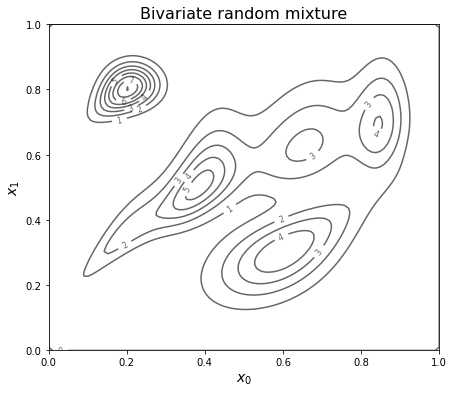

In [4]:
d = DrawFunctions()
fig = d.draw_2D_controur('Bivariate random mixture', None, X)
fig;

In [6]:
g = ot.SymbolicFunction(["x1", "x2"], ["(x1 - x2) ^ 2 - 8 * (x1 + x2 - 5)"])
x_candidate = X.getSample(int(1e4))
y_candidate = g(x_candidate)

In [8]:
alpha = 0.1
q_ref = y_candidate.computeQuantile(alpha)[0]

27.905335289916064